In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


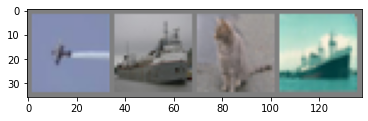

plane
ship
cat
ship


In [3]:
    #showing images

def imshow(img):
  img=img/2 + 0.5 #unnormalize images
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))                    #  in PyTorch, the order of dimension is channel*width*height but in matplotlib it’s width*height*channel. That’s why the transpose is needed.
  plt.show()                                    #plt.imshow just finishes drawing the picture and plt.show() displays the picture

#getting images

dataiter=iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

#printing labels

for i in range(4):
  print(classes[labels[i]])       #classes converts no. into animal names --- Layman terms :)

In [0]:
#building the network

class Net(nn.Module):
  
  def __init__(self):                      #remember the _ before and after init are quite important
    super(Net, self).__init__()
    self.conv1=nn.Conv2d(3, 6, 5)
    self.pool1=nn.MaxPool2d(2, 2)
    self.conv2=nn.Conv2d(6, 16, 5)
    self.fc1=nn.Linear(16*5*5, 120)
    self.fc2=nn.Linear(120, 84)
    self.fc3=nn.Linear(84, 10)

  def forward(self, x):
    x=self.pool1(F.relu(self.conv1(x)))
    x=self.pool1(F.relu(self.conv2(x)))
    x=x.view(-1, 16*5*5)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)

    return x


In [0]:
#defining optimiser and loss fxn.

net=Net()

criterion=nn.CrossEntropyLoss()
optimiser=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [6]:
#training the network

for epoch in range(2):

    current_loss=0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimiser.zero_grad()
        
        outputs=net(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        current_loss+=loss.item()

        if i%2000==1999:
            print('epoch: '+str(epoch+1)+' mini_batch: '+str(i+1)+' loss: '+str(current_loss/2000))
            current_loss=0.0

print('training done')


epoch: 1 mini_batch: 2000 loss: 2.246322053551674
epoch: 1 mini_batch: 4000 loss: 1.9373395177721977
epoch: 1 mini_batch: 6000 loss: 1.706310185611248
epoch: 1 mini_batch: 8000 loss: 1.6097610205858945
epoch: 1 mini_batch: 10000 loss: 1.5253895048350097
epoch: 1 mini_batch: 12000 loss: 1.4819907042831182
epoch: 2 mini_batch: 2000 loss: 1.3989153943434358
epoch: 2 mini_batch: 4000 loss: 1.373170294880867
epoch: 2 mini_batch: 6000 loss: 1.3367705053724348
epoch: 2 mini_batch: 8000 loss: 1.3339020029865205
epoch: 2 mini_batch: 10000 loss: 1.2976420121639967
epoch: 2 mini_batch: 12000 loss: 1.2668431486450136
training done


In [0]:
#saving the model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

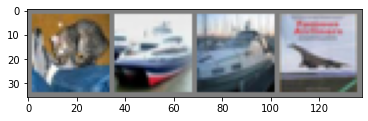

cat
ship
ship
plane


In [0]:
#testing the model

dataiter=iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
for i in range(4):
  print(classes[labels[i]])       #classes converts no. into animal names --- Layman terms :)


In [0]:
net=Net()
#loading the saved model
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [0]:
output=net(images)
#print(output)

_, predicted=torch.max(output, 1)   # this max return max value , the index . so the index is used to get the prediccted image

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship plane plane


In [0]:
correct=0
total=0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        output=net(images)
        _, predicted = torch.max(output, 1)

        total+=labels.size(0)
        correct += (predicted==labels).sum(). item()
print('Accuracy: '+ str(100*correct/total)) 

Accuracy: 56.31


In [0]:
#printing accuracy of each class

class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs=net(images)
        _, predicted=torch.max(outputs, 1)
        c=(predicted==labels).squeeze()
        for i in range(4):
            label=labels[i]
            class_correct[label]+=c[i].item()
            class_total[label]+=1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 76 %
Accuracy of  bird : 32 %
Accuracy of   cat : 31 %
Accuracy of  deer : 62 %
Accuracy of   dog : 47 %
Accuracy of  frog : 70 %
Accuracy of horse : 64 %
Accuracy of  ship : 58 %
Accuracy of truck : 49 %
